# Филтрирање на слика во фреквенциски домен

## Теорија

За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.

$$I_{f,filt} = HI_f$$

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:

$$ H(i,j) = e^{-\frac{d(i,j)^2}{f_h^2}} (1 - e^{-\frac{d(i,j)^2}{f_l^2}}) $$

Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓𝑙 се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме. 
Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

$$ F(u,v) = \iint_{-\infty}^{\infty} f(x,y) e^{-i2\pi(ux + vy)} \,dx\,dy$$

А во дискретниот домен горната равенка може да биде преведена како

$$ F(u,v) = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f[m,n] \cdot e^{-i2\pi(umx_0 + vny_0)} $$

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева трансформација е дефинирана како:

$$ f(x,y) = \iint_{-\infty}^{\infty} F(u,v) e^{i2\pi(ux + vy)} \,du\,dv$$

А во дискретниот домен горната равенка може да биде преведена како

$$ f(x,y) = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} F(m,n) \cdot e^{i2\pi(xmu_0 + ynv_0)} $$

## Имплементација

Функција за создавање на филтер:

In [1]:
function filter = create_filter(nx,ny,d0,d1)
filter = ones(nx,ny);

for i = 0:nx-1
    for j = 0:ny-1
        dist= sqrt((i-nx/2)^2 + (j-ny/2)^2);
        filter(i+1,j+1) = exp(-(dist^2)/(d1^2)).*(1.0-exp(-(dist^2)/(d0^2)));
    end
end

filter(nx/2+1,ny/2+1)=1;
end

Вчитување на сликата и Фуриева трансформација врз неа:

In [15]:
img = imread('Barbara.tif');
img_fft = fftshift(fft2(img));

Функција за добивање на филтрирана слика (параметри се фрекфенциските прагови со чекор 10):

In [16]:
function filtered_image = filter_image(l, h)
    global img img_fft
    
    fl = 1 + l*10;
    fh = 1 + h*10;
    
    img_double = im2double(img);
    [nx, ny] = size(img_double);
    
    filtered_image = abs(ifft2(ifftshift(create_filter(nx, ny, fl, fh).*img_fft)));
end

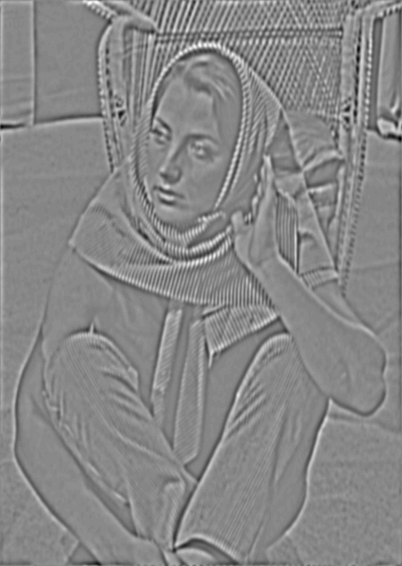

In [17]:
imshow(filter_image(5, 7));